Set OBSGEO-B to   -25.273375 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611468465.919 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


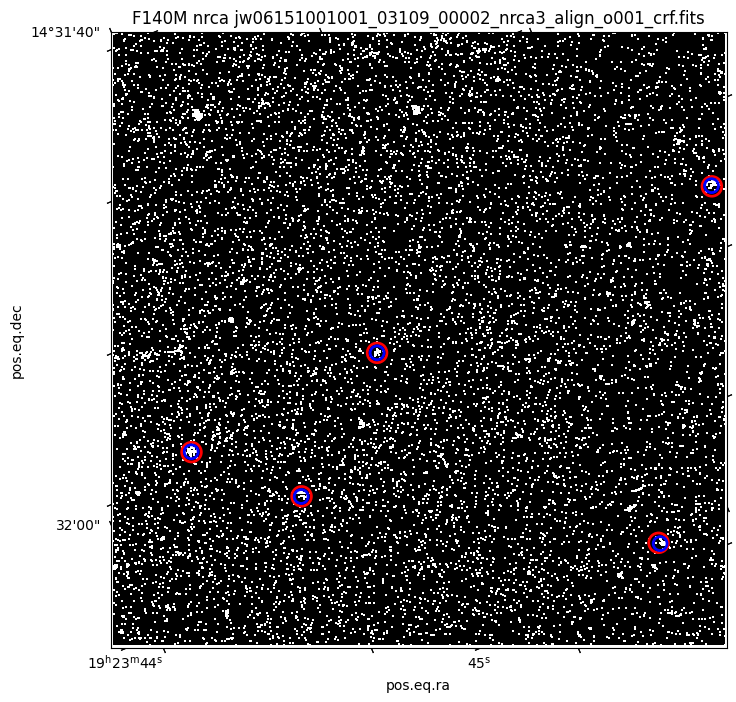

Set OBSGEO-B to   -25.271881 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611441536.798 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


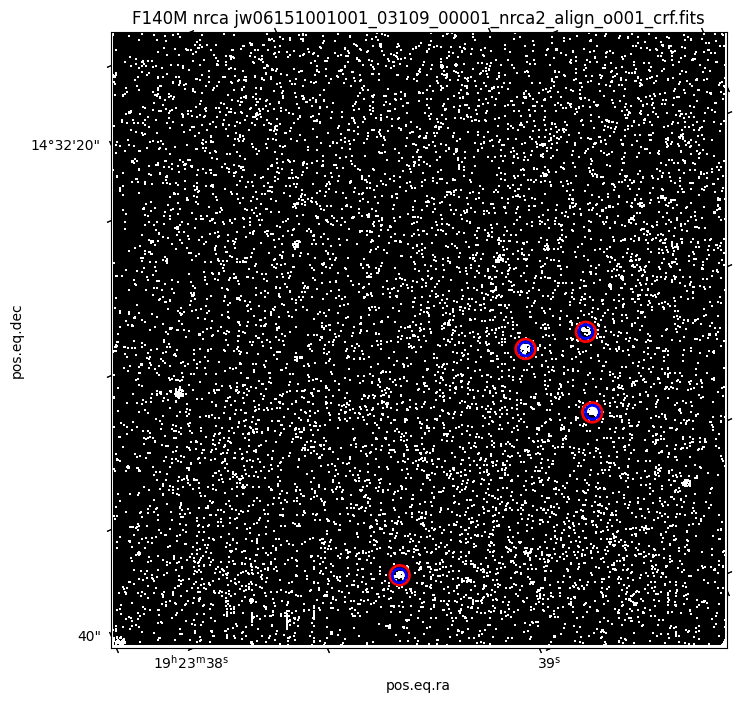

Set OBSGEO-B to   -25.284580 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611670350.990 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


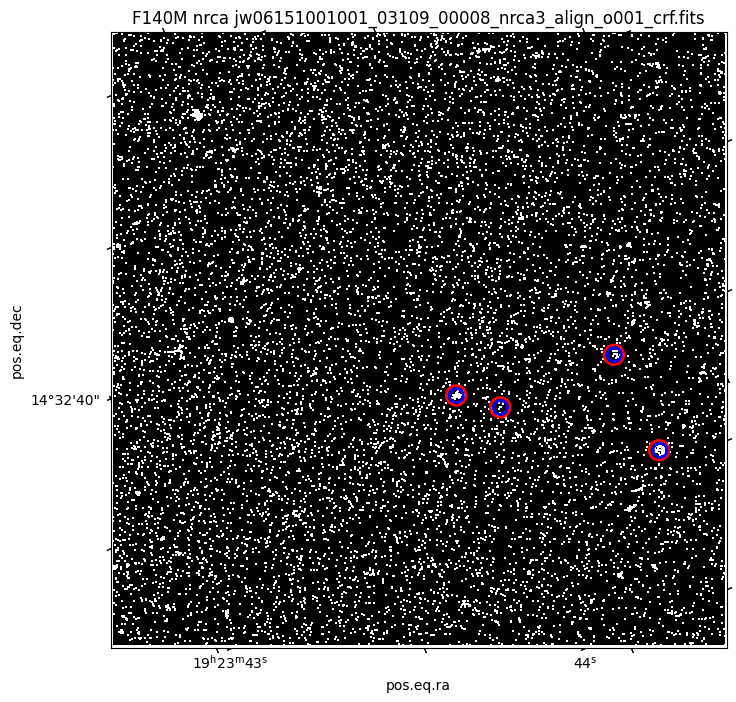

Set OBSGEO-B to   -25.273375 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611468459.746 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


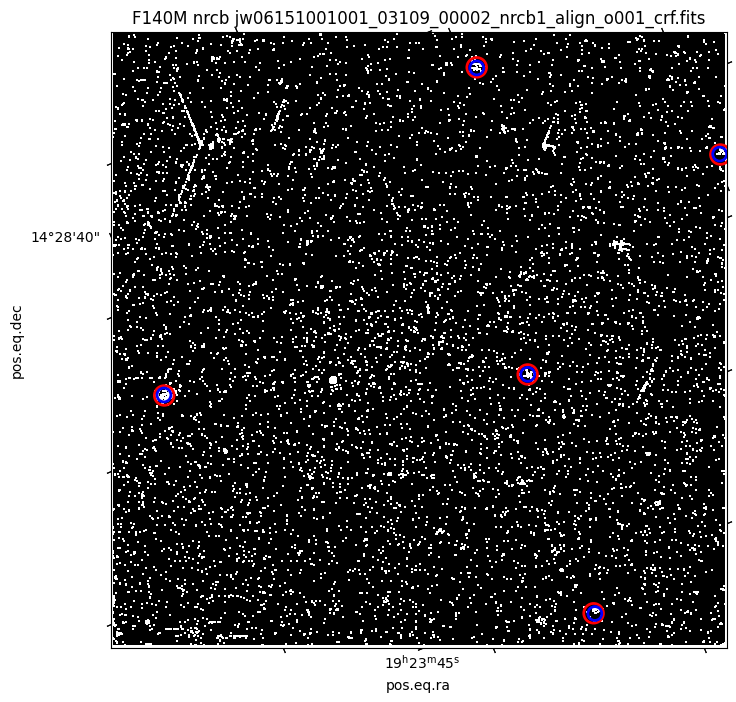

Set OBSGEO-B to   -25.284580 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611670344.821 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


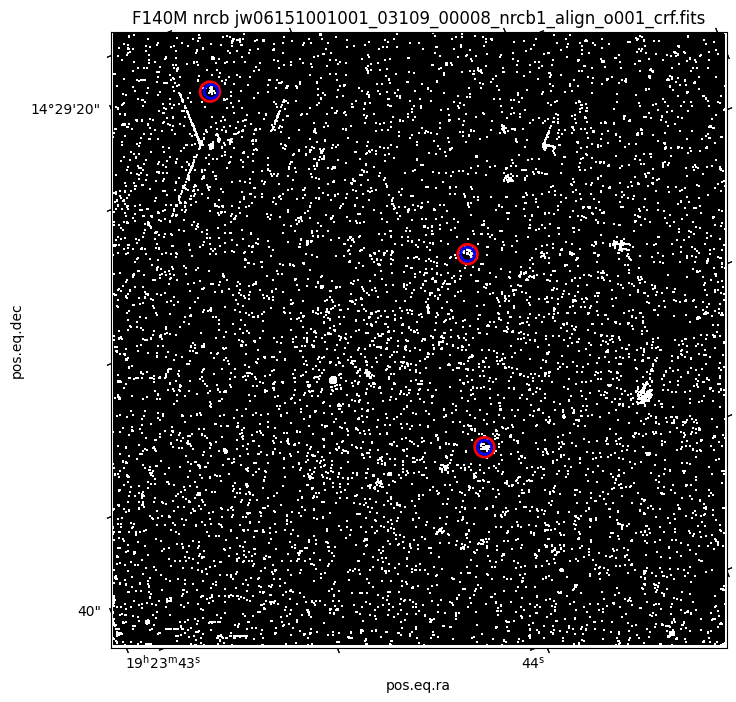

Set OBSGEO-B to   -25.281075 from OBSGEO-[XYZ].
Set OBSGEO-H to 1611607203.410 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


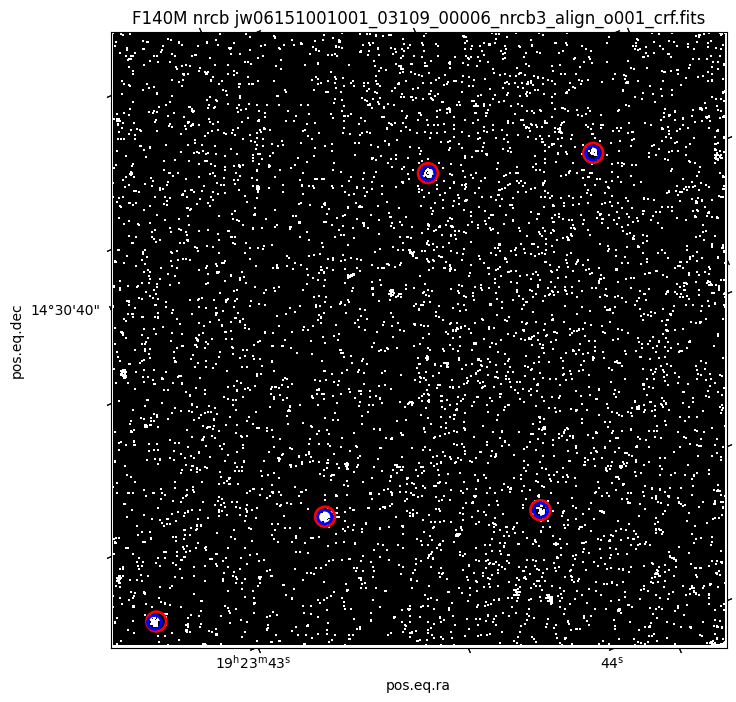

In [1]:
import glob
from astropy.table import Table
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
filt = 'F140M'
if filt in ['F140M', 'F162M', 'F182M', 'F210M', 'F335M', 'F360M', 'F410M', 'F480M']:
    modules = ['nrca', 'nrcb']
else:
    modules = ['miri']
ras = []
decs = []
for module in modules:
    sat_star_list = glob.glob(f"/orange/adamginsburg/jwst/w51/{filt}/pipeline/*{module}*newnewnewnew.fits")
    for i, sat_star in enumerate(sat_star_list):
        if i<=2:
            img_filename = sat_star.replace('_satstar_catalog_newnewnewnew.fits', '.fits')
            header_img = fits.getheader(img_filename, ext=('SCI', 1))
            wcs_img = WCS(header_img)
            cat_satstar = Table.read(sat_star)
            skycoord = cat_satstar['skycoord_fit']
            
            pixcoord = skycoord.to_pixel(wcs_img)
            fig = plt.figure(figsize=(8,8))
            ax = fig.add_subplot(111, projection=wcs_img)
            ax.imshow(fits.getdata(img_filename, ext=('SCI', 1)), origin='lower', cmap='gray', vmin=np.percentile(fits.getdata(img_filename, ext=('SCI', 1)), 5), vmax=np.percentile(fits.getdata(img_filename, ext=('SCI', 1)), 99))
            ax.scatter(pixcoord[0], pixcoord[1], s=200, edgecolor='red', facecolor='none', lw=2)
            ax.set_title(f"{filt} {module} {img_filename.split('/')[-1]}")
            xcentroid = cat_satstar['xcentroid']
            ycentroid = cat_satstar['ycentroid']
            ax.scatter(xcentroid, ycentroid, s=100, edgecolor='blue', facecolor='none', lw=2)
            plt.show()
